# Постановка задачи


# Подготовка к анализу

## Подключение библиотек

In [1]:
!pip install pandas 
!pip install numpy
!pip install matplotlib
#!pip install datetime
!pip install seaborn
!pip install plotly-express

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#import datetime as dt
import seaborn as sns
sns.set()
import plotly.express as px

## Создание вспомогательных функций

Создадим функции, которые упростят процесс вывода всей необходимой информации о датасете.

In [2]:
# Функция для обзора датасета
def overview_df(df):
    print(" HEAD OF DATAFRAME ".center(100,'-'), '\n', df.head())
    print(" INFO OF DATAFRAME ".center(100,'-'))
    df.info()
    print(" SHAPE ".center(100,'-'), '\n', 'Rows: {}'.format(df.shape[0]), '\n', 'Columns: {}'.format(df.shape[1]))
    print(" TYPES ".center(100,'-'), '\n', df.dtypes)
    print(" NUMBER OF UNIQUES ".center(100,'-'), '\n', df.nunique())
    print(" MISSING VALUES ".center(100,'-'), '\n', missing_values(df))
    print(" DUPLICATED VALUES ".center(100,'-'), '\n', cheking_duplicates(df))
    print(" DESCRIPTIVE STATISTICS ".center(100,'-'), '\n', df.describe().T)

# Функция для поиска пропущенных значений
def missing_values(df):
    mn = df.isnull().sum().sort_values(ascending = False)
    mp = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    missing_values = pd.concat([mn, mp], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    if mn.sum() > 0:
        return missing_values[missing_values['Missing_Number'] > 0]
    else:
        return 'There are no missing values.'

# Функция для проверки и подсчета количества дубликатов
def cheking_duplicates(df):
    duplicate_values = df.duplicated(keep = 'first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace = True)
        return 'The number of duplicated values is ' + str(duplicate_values) + '. Duplicates were dropped. New shape is ' + str(df.shape)
    else:
        return 'There are no duplicate values.'

# Первичный обзор датасета

С помощью написанной функции overview_df(df) выведем всю информацию о датасете.

In [3]:
df0 = pd.read_csv(r'C:\Users\Александра\Desktop\customer.csv')
df = df0.copy()

overview_df(df)

---------------------------------------- HEAD OF DATAFRAME ----------------------------------------- 
            InvoiceDate InvoiceNo StockCode  \
0  2010-12-01 08:26:00    536365    85123A   
1  2010-12-01 08:26:00    536365     71053   
2  2010-12-01 08:26:00    536365    84406B   
3  2010-12-01 08:26:00    536365    84029G   
4  2010-12-01 08:26:00    536365    84029E   

                           Description  Quantity  UnitPrice  CustomerID  Age  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55     17850.0   77   
1                  WHITE METAL LANTERN         6       3.39     17850.0   77   
2       CREAM CUPID HEARTS COAT HANGER         8       2.75     17850.0   77   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39     17850.0   77   
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39     17850.0   77   

   Gender        Income         Country  
0  female  26300.794657  United Kingdom  
1  female  26300.794657  United Kingdom  
2  female  26

# Предварительная обработка данных

## Очистка данных

### Ошибки в данных

### Пропущенные значения 

### Пропуски во временных рядах 

## Преобразование данных

### Преобразование количественных данных

### Работа с выбросами

# Вторичный обзор датасета после базовой чистки данных

In [4]:
# Вывод обзора датасета с помощью той же написанной функции
overview_df(df)

---------------------------------------- HEAD OF DATAFRAME ----------------------------------------- 
            InvoiceDate InvoiceNo StockCode  \
0  2010-12-01 08:26:00    536365    85123A   
1  2010-12-01 08:26:00    536365     71053   
2  2010-12-01 08:26:00    536365    84406B   
3  2010-12-01 08:26:00    536365    84029G   
4  2010-12-01 08:26:00    536365    84029E   

                           Description  Quantity  UnitPrice  CustomerID  Age  \
0   WHITE HANGING HEART T-LIGHT HOLDER         6       2.55     17850.0   77   
1                  WHITE METAL LANTERN         6       3.39     17850.0   77   
2       CREAM CUPID HEARTS COAT HANGER         8       2.75     17850.0   77   
3  KNITTED UNION FLAG HOT WATER BOTTLE         6       3.39     17850.0   77   
4       RED WOOLLY HOTTIE WHITE HEART.         6       3.39     17850.0   77   

   Gender        Income         Country  
0  female  26300.794657  United Kingdom  
1  female  26300.794657  United Kingdom  
2  female  26

# Исследовательский анализ данных (Exploratory Data Analysis - EDA)

Дубликаты уже были посчитаны и удалены во время составления первичного обзора датасета. 
Далее перейдем к 1-му этапу EDA -- описанию данных, содержащихся в каждом из столбцов, и разберемся, какие из них и почему необходимо почистить.
Почередно проверим, все ли данные из столбцов подходят для анализа, и сделаем выводы о полученной информации.

## 1 этап -- описание данных

### Категориальные данные


#### Столбец 8 'Gender'

In [5]:
# Проверка количества уникальных совпадений по полу клиентов (Gender) среди всех записей
df.Gender.value_counts(normalize = True)

Gender
female    0.737506
male      0.262494
Name: proportion, dtype: float64

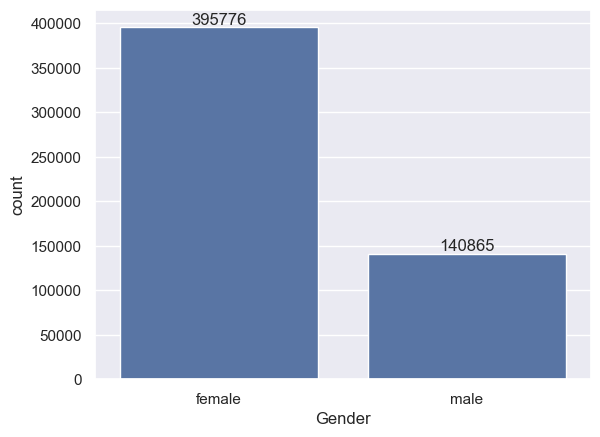

In [6]:
# Визуализация количества записей в категории пола клиентов (Gender)
ax = sns.countplot(x = 'Gender', data = df)
for label in ax.containers:
    ax.bar_label(label)

#### Столбец 10 'Country'

In [7]:
# Проверка количества уникальных совпадений по стране (Country) среди всех записей
df.Country.value_counts(normalize = True)

Country
United Kingdom          0.913646
Germany                 0.017665
France                  0.015916
EIRE                    0.015250
Spain                   0.004711
Netherlands             0.004418
Belgium                 0.003855
Switzerland             0.003716
Portugal                0.002814
Australia               0.002344
Norway                  0.002024
Italy                   0.001496
Channel Islands         0.001411
Finland                 0.001295
Cyprus                  0.001139
Sweden                  0.000859
Unspecified             0.000824
Austria                 0.000747
Denmark                 0.000725
Japan                   0.000667
Poland                  0.000635
Israel                  0.000548
USA                     0.000542
Hong Kong               0.000529
Singapore               0.000427
Iceland                 0.000339
Canada                  0.000281
Greece                  0.000272
Malta                   0.000237
United Arab Emirates    0.000127
Eu

In [8]:
# Заметим, около 90% записей о стране (Country) относятся к Великобратании (United Kingdom)
# Разделим все записи о странах (Country) на две категории: "United Kingdom" и "Others", которая будет объединять все остальные страны
df['Country'] = df['Country'].apply(lambda x: 'United Kingdom' if x == 'United Kingdom' else 'Others')

In [9]:
# Заново выполним проверку количества уникальных совпадений по стране (Country) среди всех записей
df.Country.value_counts(normalize = True)

Country
United Kingdom    0.913646
Others            0.086354
Name: proportion, dtype: float64

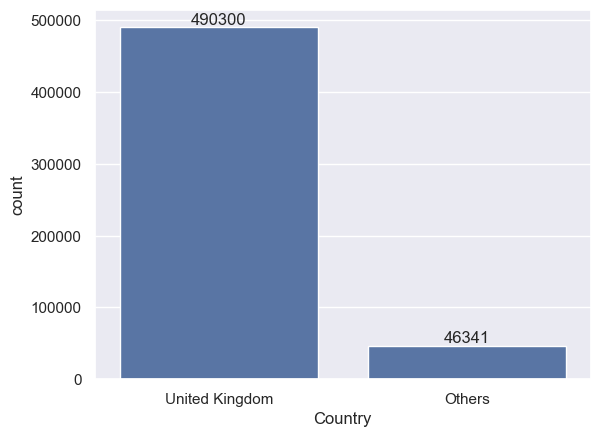

In [10]:
# Визуализация количества записей в категории страны (Country)
ax = sns.countplot(x = 'Country', data = df)
for label in ax.containers:
    ax.bar_label(label)

### Количественные данные

#### Столбец 4 'Quantity'

In [11]:
# Посмотрим на описательные статистики количества (Quantity) и распределение по перцентилям
df.Quantity.describe(percentiles = [0.01, 0.05, 0.15, 0.25, 0.5, 0.75, 0.85, 0.95, 0.99])

count    536641.000000
mean          9.620029
std         219.130156
min      -80995.000000
1%           -2.000000
5%            1.000000
15%           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
85%          12.000000
95%          30.000000
99%         100.000000
max       80995.000000
Name: Quantity, dtype: float64

In [12]:
# Заметим, что существуют отрицательные значения, которые могут указывать на отмененные/возвращенные заказы
# Оставим только те записи, у которых положительные значения количества (Quantity), которые будем считать совершенными заказами
df = df[df['Quantity'] >= 0]

In [13]:
df.Quantity.describe(percentiles = [0.01, 0.05, 0.15, 0.25, 0.5, 0.75, 0.85, 0.95, 0.99])

count    526054.000000
mean         10.730874
std         157.591838
min           1.000000
1%            1.000000
5%            1.000000
15%           1.000000
25%           1.000000
50%           4.000000
75%          11.000000
85%          12.000000
95%          30.000000
99%         100.000000
max       80995.000000
Name: Quantity, dtype: float64

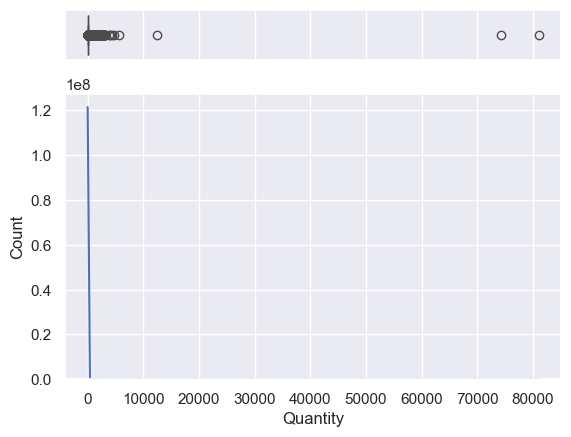

In [14]:
# Посмотрим на распределение и выбросы для метрики 'Quantity'

fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df['Quantity'], ax = ax_box)
sns.histplot(data = df, x = 'Quantity', ax = ax_hist, bins = 10, kde = True)

plt.show()

In [15]:
# Выведем отдельно значения 0.99 и 0.95 перцентилей метрики 'Quantity'
print('percentile 0.99 = ', df.Quantity.quantile(.99))
print('percentile 0.95 = ', df.Quantity.quantile(.95))

percentile 0.99 =  100.0
percentile 0.95 =  30.0


In [16]:
# Удалим значения метрики 'Quantity' ниже 0.95 перцентиля
df = df[(df.Quantity <= df.Quantity.quantile(.95))]

In [17]:
df.Quantity.describe(percentiles = [0.01, 0.05, 0.15, 0.25, 0.5, 0.75, 0.85, 0.95, 0.99])

count    500227.000000
mean          5.953355
std           6.406287
min           1.000000
1%            1.000000
5%            1.000000
15%           1.000000
25%           1.000000
50%           3.000000
75%          10.000000
85%          12.000000
95%          24.000000
99%          25.000000
max          30.000000
Name: Quantity, dtype: float64

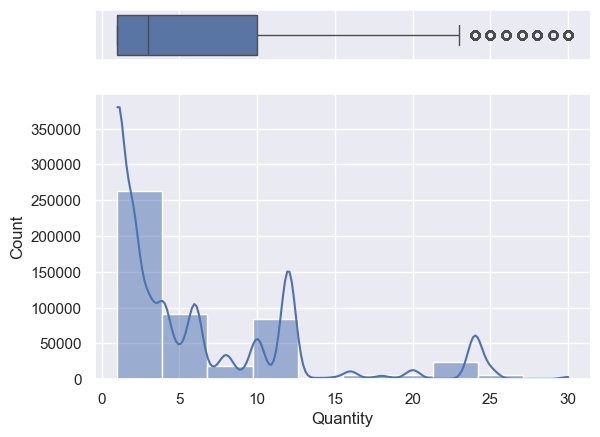

In [18]:
# Заново посмотрим на распределение и выбросы для метрики 'Quantity'
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df['Quantity'], ax = ax_box)
sns.histplot(data = df, x = 'Quantity', ax = ax_hist, bins = 10, kde = True)

plt.show()

#### Столбец 5 'UnitPrice'

In [19]:
# Посмотрим описательные статистики значений цены за единицу товара (UnitPrice) и распределение по перцентилям
df.UnitPrice.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    500227.000000
mean          3.991875
std          43.072884
min      -11062.060000
25%           1.250000
50%           2.100000
75%           4.130000
85%           5.790000
95%           9.950000
99%          18.000000
max       13541.330000
Name: UnitPrice, dtype: float64

In [20]:
# Удаление записей с нулевой ценой за единицу товара (UnitPrice = 0) и отрицательными значениями
df = df[df['UnitPrice'] > 0]

In [21]:
df.UnitPrice.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    499275.000000
mean          4.043799
std          36.989668
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
85%           5.790000
95%           9.950000
99%          18.000000
max       13541.330000
Name: UnitPrice, dtype: float64

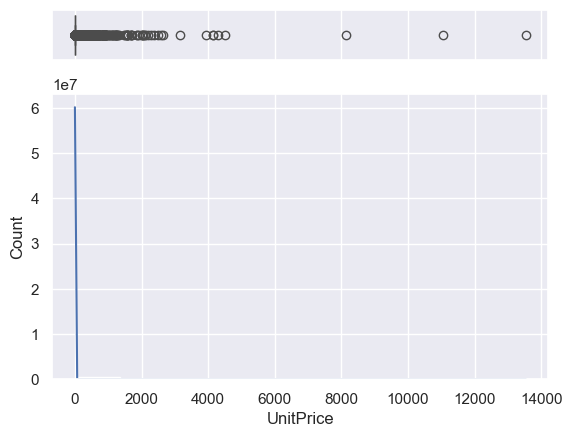

In [22]:
# Посмотрим на распределение и выбросы для метрики 'UnitPrice'

fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df['UnitPrice'], ax = ax_box)
sns.histplot(data = df, x = 'UnitPrice', ax = ax_hist, bins = 10, kde = True)

plt.show()

In [23]:
# Выведем отдельно значения 0.95 перцентиля метрики 'UnitPrice'
print('percentile 0.95 = ', df.UnitPrice.quantile(.95))

percentile 0.95 =  9.95


In [24]:
# Удалим значения метрики 'UnitPrice' ниже 0.95 перцентиля
df = df[(df.UnitPrice < df.UnitPrice.quantile(.95))]

In [25]:
df.UnitPrice.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    469478.000000
mean          2.695639
std           2.059248
min           0.001000
25%           1.250000
50%           2.080000
75%           3.750000
85%           4.950000
95%           7.900000
99%           8.500000
max           9.890000
Name: UnitPrice, dtype: float64

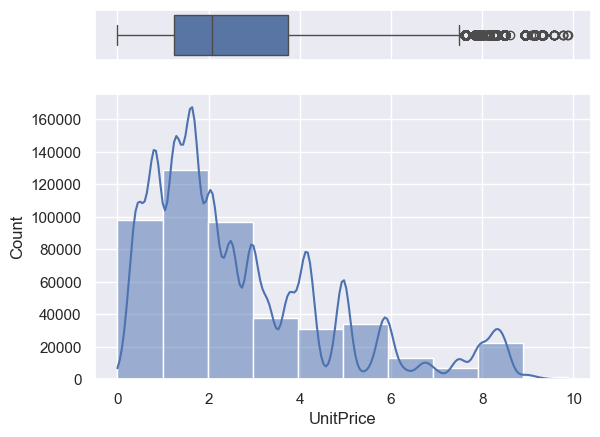

In [26]:
# Заново посмотрим на распределение и выбросы для метрики 'UnitPrice'
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df['UnitPrice'], ax = ax_box)
sns.histplot(data = df, x = 'UnitPrice', ax = ax_hist, bins = 10, kde = True)

plt.show()

#### Столбец 7 'Age'

In [27]:
# Топ-10 возрастов клиентов (Age) изначально
df.Age.value_counts().head(10)

Age
25    126898
28     15724
44     15510
33     14446
29     13871
42     12245
35     12101
26     12010
27     11288
45     10564
Name: count, dtype: int64

In [28]:
# Посмотрим на описательные статистики записей о возрасте клиентов (Age) по перцентилям
df.Age.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    469478.000000
mean         34.795948
std          12.983518
min          15.000000
25%          25.000000
50%          31.000000
75%          43.000000
85%          49.000000
95%          61.000000
99%          72.000000
max         100.000000
Name: Age, dtype: float64

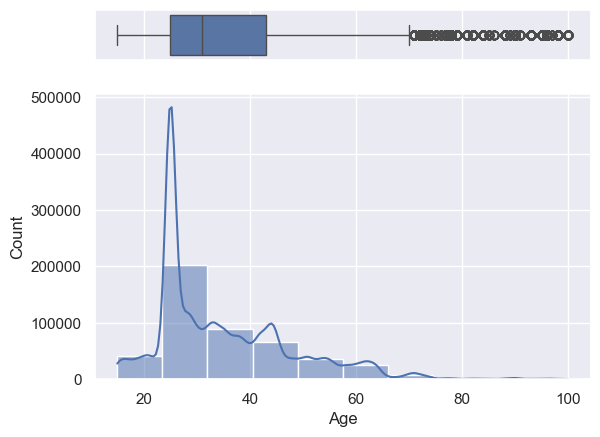

In [29]:
# Посмотрим на распределение и выбросы для метрики 'Age'

fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df['Age'], ax = ax_box)
sns.histplot(data = df, x = 'Age', ax = ax_hist, bins = 10, kde = True)

plt.show()

In [30]:
# Выведем отдельно значение 0.99 перцентиля метрики 'Age'
print('percentile 0.95 = ', df.Age.quantile(.95))

percentile 0.95 =  61.0


In [31]:
# Удалим значения метрики 'Age' ниже 0.99 перцентиля
df = df[(df.Age <= df.Age.quantile(.95))]

In [32]:
df.Age.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    447357.000000
mean         33.123054
std          10.677441
min          15.000000
25%          25.000000
50%          29.000000
75%          41.000000
85%          45.000000
95%          55.000000
99%          60.000000
max          61.000000
Name: Age, dtype: float64

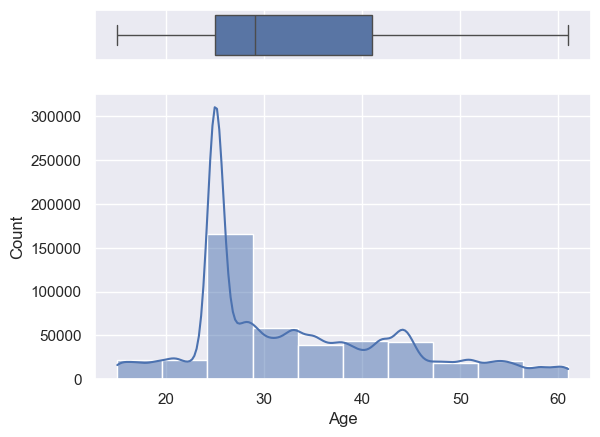

In [33]:
# Заново посмотрим на распределение и выбросы для метрики 'Age'
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df['Age'], ax = ax_box)
sns.histplot(data = df, x = 'Age', ax = ax_hist, bins = 10, kde = True)

plt.show()

In [34]:
# Топ-10 возрастов клиентов (Age) после очистки от выбросов
df.Age.value_counts().head(10)

Age
25    126898
28     15724
44     15510
33     14446
29     13871
42     12245
35     12101
26     12010
27     11288
45     10564
Name: count, dtype: int64

#### Столбец 9 'Income'

In [35]:
# Посмотрим описательные статистики значений цены за единицу товара (Income) и распределение по перцентилям
df.Income.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    447357.000000
mean      32994.747546
std        5530.115553
min       18662.725643
25%       32130.475292
50%       32419.744535
75%       33653.790652
85%       40087.893715
95%       42984.646214
99%       44245.933133
max       45925.206366
Name: Income, dtype: float64

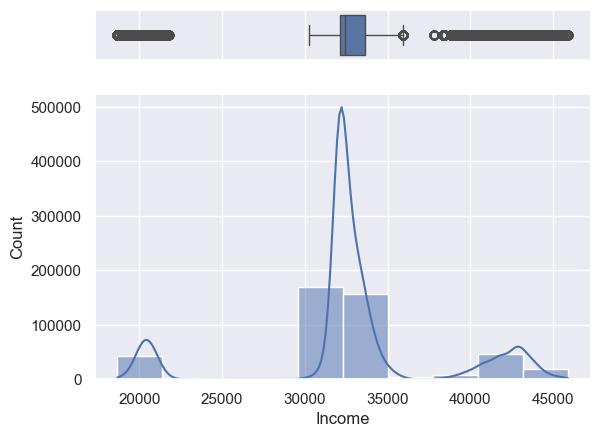

In [36]:
# Посмотрим на распределение и выбросы для метрики 'Income'

fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df['Income'], ax = ax_box)
sns.histplot(data = df, x = 'Income', ax = ax_hist, bins = 10, kde = True)

plt.show()

Q1 = 32130.47529224485
Q3 = 33653.790652493175
IQR = 1523.3153602483253


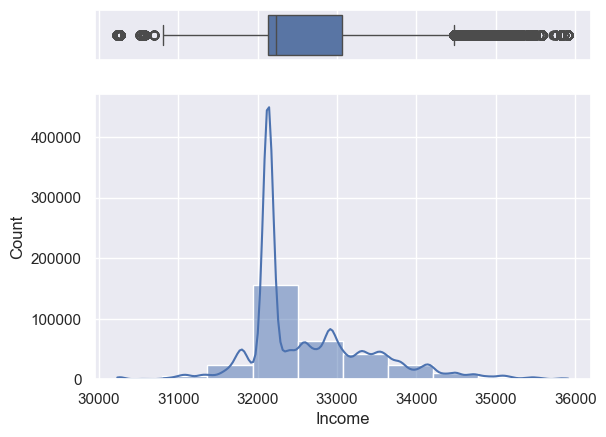

In [37]:
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q3 =', Q3)
print('IQR =', IQR)

df = df[(df['Income'] < Q3 + 1.5 * IQR) & (df['Income'] > Q1 - 1.5 * IQR)]
fig, (ax_box, ax_hist) = plt.subplots(2, # две строки в сетке подграфиков,
                                    sharex = True, # единая шкала по оси x и
                                    gridspec_kw = {'height_ratios': (.15, .85)}) # пропорция 15/85 по высоте

sns.boxplot(x = df['Income'], ax = ax_box)
sns.histplot(data = df, x = 'Income', ax = ax_hist, bins = 10, kde = True)

# выведем результат
plt.show()

In [38]:
df.Income.describe(percentiles = [0.25, 0.5, 0.75, 0.85,0.95, 0.99])

count    330134.000000
mean      32633.500058
std         803.643506
min       30232.934675
25%       32130.475292
50%       32235.726819
75%       33067.274101
85%       33513.444454
95%       34179.402945
99%       35086.251682
max       35910.746228
Name: Income, dtype: float64

### Временные ряды

#### Столбец 0 'InvoiceDate'

In [39]:
# Первая покупка в датасете
print('The minimum date is:', df.InvoiceDate.min())

# Последняя покупка в датасете
print('The maximum date is:', df.InvoiceDate.max())

The minimum date is: 2010-12-01 09:41:00
The maximum date is: 2011-12-09 12:50:00


Из собранных данных можно заметить, что первая запись в датасете относится к 1 декабря 2010 года в 8:26, а последняя — к 9 декабря 2011 года в 12:50.
Исходя из этого, можем исключить декабрь 2011 года из анализа, поскольку нет полной информации об этом месяце.

In [40]:
# Удаление записи из датафрейма за декабрь 2011 года
df = df[df.InvoiceDate < '2011-12-01']

### Остальные данные

#### Столбец 1 'InvoiceNo'

In [41]:
# Удаление всех номеров операций (InvoiceNo), начинающихся с символа 'C'
df = df[df['InvoiceNo'].str.startswith('C') != True]

In [42]:
# Проверка количества уникальных номеров операций (InvoiceNo)
df.InvoiceNo.nunique()

11017

#### Столбец 2 'StockCode'

In [43]:
# Проверка количества уникальных биржевых кодов-идентификаторов (StockCode) среди всех записей о продажах
df.StockCode.nunique()

3698

In [44]:
# Топ-10 биржевых кодов-идентификаторов (StockCode), которые продавались чаще всего
df.StockCode.value_counts().head(10)

StockCode
85099B    1264
85123A    1205
20725      967
47566      856
21212      835
20727      821
22383      808
22386      796
84879      791
22457      791
Name: count, dtype: int64

#### Столбец 3 'Description'

In [45]:
# Проверка количества уникальных товаров (Description) среди всех записей о продажах
df.Description.nunique()

3782

In [46]:
# Топ-10 проданных товаров (Description)
df.Description.value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    1265
JUMBO BAG RED RETROSPOT               1264
LUNCH BAG RED RETROSPOT                967
PARTY BUNTING                          856
PACK OF 72 RETROSPOT CAKE CASES        835
LUNCH BAG  BLACK SKULL.                821
JUMBO BAG PINK POLKADOT                796
NATURAL SLATE HEART CHALKBOARD         791
ASSORTED COLOUR BIRD ORNAMENT          791
JUMBO SHOPPER VINTAGE RED PAISLEY      784
Name: count, dtype: int64

Обратим внимание, что бывают записи, в которых описания товаров (Description) содержат некоторую информацию, не относящуюся к продажам. 

In [47]:
# Проверка данных, где записи описаний (Description) состоят из '?' или начинаются с '?'
df[df['Description'].str.startswith('?') == True]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country


In [48]:
# Удаление всех полученных записей
df = df[df['Description'].str.startswith('?') != True]

In [49]:
# Проверяем данных, где записи описаний (Description) начинаются с '*' 
df[df['Description'].str.startswith('*') == True]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country
35675,2010-12-17 14:54:00,539437,20954,*USB Office Mirror Ball,1,8.47,NaN,25,female,32130.475292,United Kingdom
37095,2010-12-17 17:08:00,539453,20954,*USB Office Mirror Ball,1,8.47,NaN,25,female,32130.475292,United Kingdom


In [50]:
# Заметим, что при этом CustomerId = NaN
# Изменение записей на соответствующие описания (Description) без символа '*' и перевод в верхний регистр, как и во всех остальных записях
df['Description'] = df['Description'].replace(('*Boombox Ipod Classic','*USB Office Mirror Ball'),
                                             ('BOOMBOX IPOD CLASSIC','USB OFFICE MIRROR BALL'))

In [51]:
# В описаниях товаров (Description) есть записи строчными (в нижнем регистре) буквами - это "шумы" в датасете, которые можно удалить
df[df['Description'].str.islower() == True]['Description'].value_counts()

Series([], Name: count, dtype: int64)

In [52]:
# Удаление всех найденных "шумов"
df = df[df['Description'].str.islower() != True]

In [53]:
# В описаниях товаров (Description) есть записи, 
# которые начинаются с заглавной буквы и не соответствуют типу большинства записей - это "шумы" в датасете, которые можно удалить
df[df['Description'].str.istitle() == True]['Description'].value_counts()

Description
Manual                   109
High Resolution Image      2
Bank Charges               1
Name: count, dtype: int64

In [54]:
# Удаление всех найденных "шумов"
df = df[df['Description'].str.istitle() != True]

In [55]:
# Преобразование записей товаров (Description) к единому виду, удалив лишние пробелы с начала и конца строки
df['Description'] = df['Description'].str.strip()

In [56]:
# Подведем итоги и выведем информацию после чистки данных о новом Топ-10 проданных товаров (Description)
df.Description.value_counts().head(10)

Description
WHITE HANGING HEART T-LIGHT HOLDER    1265
JUMBO BAG RED RETROSPOT               1264
LUNCH BAG RED RETROSPOT                967
PARTY BUNTING                          856
PACK OF 72 RETROSPOT CAKE CASES        835
LUNCH BAG  BLACK SKULL.                821
JUMBO BAG PINK POLKADOT                796
ASSORTED COLOUR BIRD ORNAMENT          791
NATURAL SLATE HEART CHALKBOARD         791
JUMBO SHOPPER VINTAGE RED PAISLEY      784
Name: count, dtype: int64

In [57]:
# Проверка количества уникальных товаров (Description) среди всех записей о продажах
df.Description.nunique()

3768

#### Столбец 6 'CustomerID'

In [58]:
# Проверка количество уникальных идентификаторов клиентов (CustomerID)
df.CustomerID.nunique()

2388

In [59]:
# Проверка записей, в которых идентификатор клиента (CustomerID) имеет пустые значения
df[df.CustomerID.isnull()]

,InvoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Age,Gender,Income,Country
1443,2010-12-01 14:32:00,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2.51,NaN,25,female,32130.475292,United Kingdom
1444,2010-12-01 14:32:00,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2.51,NaN,25,female,32130.475292,United Kingdom
1445,2010-12-01 14:32:00,536544,21786,POLKADOT RAIN HAT,4,0.85,NaN,25,female,32130.475292,United Kingdom
1446,2010-12-01 14:32:00,536544,21787,RAIN PONCHO RETROSPOT,2,1.66,NaN,25,female,32130.475292,United Kingdom
1447,2010-12-01 14:32:00,536544,21790,VINTAGE SNAP CARDS,9,1.66,NaN,25,female,32130.475292,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...
515863,2011-11-30 15:33:00,579787,21888,BINGO SET,2,7.46,NaN,25,female,32130.475292,United Kingdom
515864,2011-11-30 15:33:00,579787,21912,VINTAGE SNAKES & LADDERS,1,7.46,NaN,25,female,32130.475292,United Kingdom
515865,2011-11-30 15:33:00,579787,21916,SET 12 RETRO WHITE CHALK STICKS,1,0.79,NaN,25,female,32130.475292,United Kingdom
515866,2011-11-30 15:33:00,579787,21929,JUMBO BAG PINK VINTAGE PAISLEY,1,4.13,NaN,25,female,32130.475292,United Kingdom


In [60]:
# Удаление записей, в которых идентификатор клиента (CustomerID) имеет пустые значения
df = df[~df.CustomerID.isnull()]

## 2 этап -- нахождение различий


### Два категориальных признака

In [65]:
# Таблица сопряженности для Country и Gender
crosstab_Gender = pd.crosstab(df['Country'], df['Gender'], normalize = 'index')
crosstab_Gender.columns = ['Female', 'Male']
crosstab_Gender = crosstab_Gender.reset_index()

print('Таблица сопряженности для Country и Gender:')
print(round(crosstab_Gender, 3), '\n')

Таблица сопряженности для version и retention_1:
          Country  Female   Male
0          Others   0.521  0.479
1  United Kingdom   0.634  0.366 



In [66]:
# Процентное соотношение каждой категории 
Country_counts = df['Country'].value_counts(normalize = True) * 100
Gender_counts = df['Gender'].value_counts(normalize = True) * 100

print('Процентное соотношение каждой категории в Country:')
print(round(Country_counts, 3), '\n')
print('Процентное соотношение каждой категории в Gender:' )
print(round(Gender_counts, 3), '\n')

Процентное соотношение каждой категории в Country:
Country
United Kingdom    89.056
Others            10.944
Name: proportion, dtype: float64 

Процентное соотношение каждой категории в Gender:
Gender
female    62.148
male      37.852
Name: proportion, dtype: float64 



#### 'Country' by 'Gender'

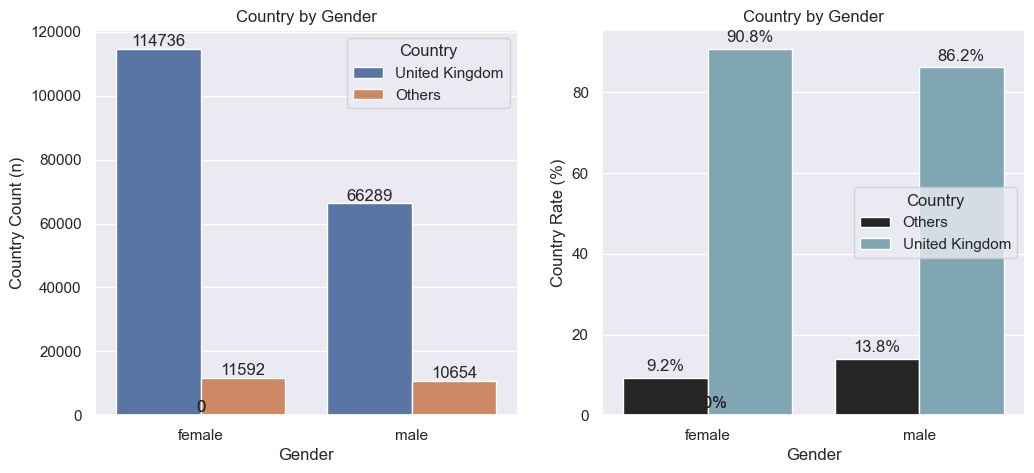

In [69]:
# retention_1 = Gender, version = Country
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(ax = axes[0], data = df, x = 'Gender', hue = 'Country')
for i in axes[0].patches:
    height = i.get_height()
    axes[0].text(i.get_x() + i.get_width() / 2., height + 1, f'{height:.0f}', ha = 'center', va = 'bottom')
axes[0].set_title('Country by Gender')
axes[0].set_ylabel('Country Count (n)')

Country_by_Gender = df.groupby(['Gender', 'Country']).size().reset_index(name = 'counts')
Country_by_Gender['percentage'] = Country_by_Gender['counts'] / Country_by_Gender.groupby('Gender')['counts'].transform('sum') * 100
sns.barplot(ax = axes[1], x = 'Gender', y = 'percentage', hue = 'Country', data = Country_by_Gender, palette = 'dark:#7AB')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha = 'center', va = 'bottom')
axes[1].set_title('Country by Gender')
axes[1].set_ylabel('Country Rate (%)')

plt.show()

#### 'Gender' by 'Country'

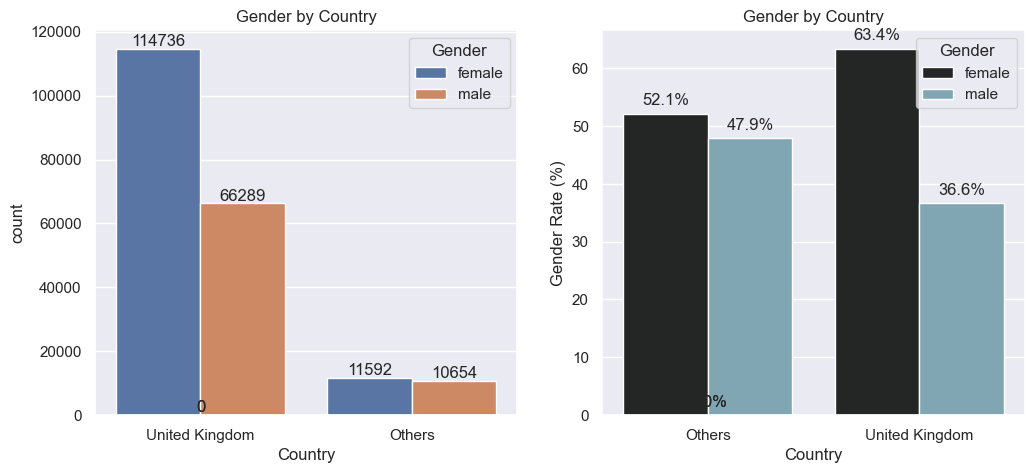

In [71]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(ax = axes[0], data = df, x = 'Country', hue = 'Gender')
for i in axes[0].patches:
    height = i.get_height()
    axes[0].text(i.get_x() + i.get_width() / 2., height + 1, f'{height:.0f}', ha = 'center', va = 'bottom')
axes[0].set_title('Gender by Country')

# Анализ Gender по версиям
Gender_by_Country = df.groupby(['Country', 'Gender']).size().reset_index(name = 'counts')
Gender_by_Country['percentage'] = Gender_by_Country['counts'] / Gender_by_Country.groupby('Country')['counts'].transform('sum') * 100
sns.barplot(ax = axes[1], x = 'Country', y = 'percentage', hue = 'Gender', data = Gender_by_Country, palette = 'dark:#7AB')
for p in axes[1].patches:
    height = p.get_height()
    axes[1].text(p.get_x() + p.get_width() / 2., height + 1, f'{height:.1f}%', ha = 'center', va = 'bottom')
axes[1].set_title('Gender by Country')
axes[1].set_ylabel('Gender Rate (%)')

plt.show()

### Категориальный и количественный признаки

#### 'Gender' & 'Age'

In [72]:
# Посчитаем, сколько пользователей достигло каждых из ворот
df.groupby('Gender').agg({'Age': 'count'})

,Age
Gender,
female,126328
male,76943


<Axes: xlabel='Age', ylabel='Count'>

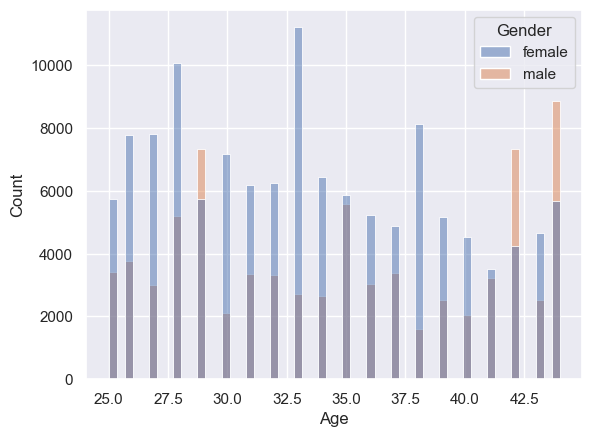

In [73]:
# Построим гистограмму распределения Age по Gender
# в библиотеке Seaborn в x мы поместим количественный признак, в hue - категориальный
sns.histplot(x = 'Age', hue = 'Gender', data = df) 

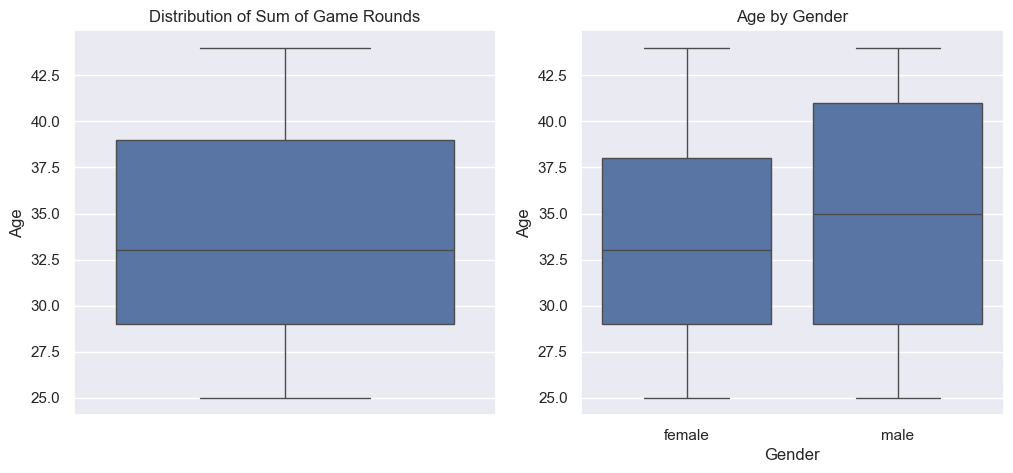

In [75]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Распределение "Age" в виде 'ящика с усами'
sns.boxplot(ax = axes[0], y = df['Age'])
axes[0].set_title('Distribution of Age')
axes[0].set_ylabel('Age')

# Распределение "Age" в виде 'ящика с усами' по версиям
sns.boxplot(ax = axes[1], x = 'Gender', y = 'Age', data = df)
axes[1].set_title('Age by Gender')
axes[1].set_ylabel('Age')

plt.show()

#### 'Gender' & 'Income'

In [76]:
# Посчитаем, сколько пользователей достигло каждых из ворот
df.groupby('Gender').agg({'Income': 'count'})

,Income
Gender,
female,126328
male,76943


<Axes: xlabel='Income', ylabel='Count'>

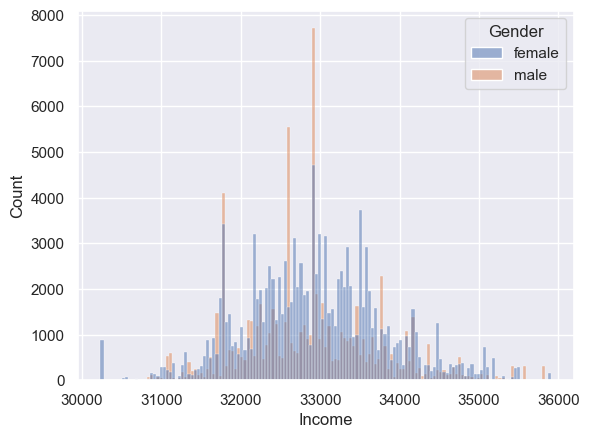

In [77]:
# Построим гистограмму распределения Income по Gender
sns.histplot(x = 'Income', hue = 'Gender', data = df) 

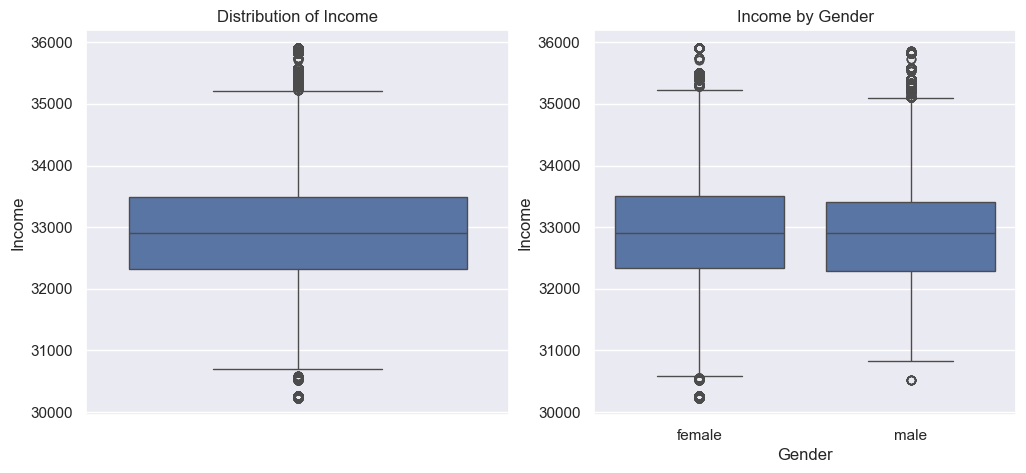

In [78]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Распределение "Income" в виде 'ящика с усами'
sns.boxplot(ax = axes[0], y = df['Income'])
axes[0].set_title('Distribution of Income')
axes[0].set_ylabel('Income')

# Распределение "Income" в виде 'ящика с усами' по версиям
sns.boxplot(ax = axes[1], x = 'Gender', y = 'Income', data = df)
axes[1].set_title('Income by Gender')
axes[1].set_ylabel('Income')

plt.show()

#### 'Country' & 'Age'

In [79]:
# Посчитаем, сколько пользователей достигло каждых из ворот
df.groupby('Country').agg({'Age': 'count'})

,Age
Country,
Others,22246
United Kingdom,181025


<Axes: xlabel='Age', ylabel='Count'>

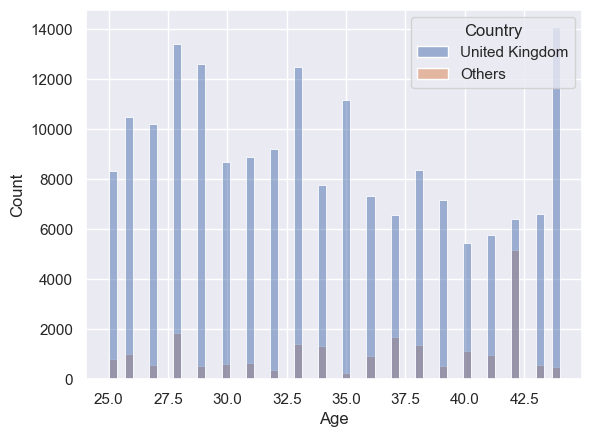

In [80]:
# Построим гистограмму распределения Age по Country
sns.histplot(x = 'Age', hue = 'Country', data = df) 

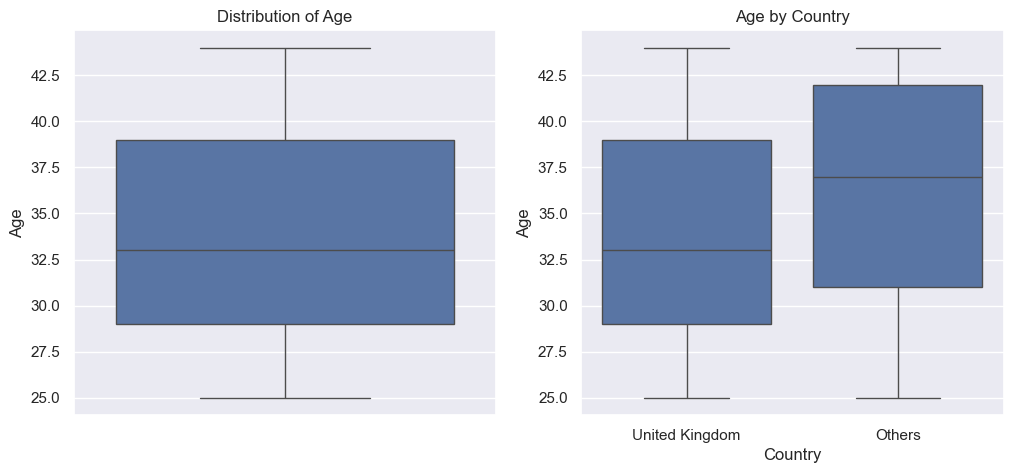

In [81]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Распределение "Age" в виде 'ящика с усами'
sns.boxplot(ax = axes[0], y = df['Age'])
axes[0].set_title('Distribution of Age')
axes[0].set_ylabel('Age')

# Распределение "Age" в виде 'ящика с усами' по версиям
sns.boxplot(ax = axes[1], x = 'Country', y = 'Age', data = df)
axes[1].set_title('Age by Country')
axes[1].set_ylabel('Age')

plt.show()

#### 'Country' & 'Income'

In [82]:
# Посчитаем, сколько пользователей достигло каждых из ворот
df.groupby('Country').agg({'Income': 'count'})

,Income
Country,
Others,22246
United Kingdom,181025


<Axes: xlabel='Income', ylabel='Count'>

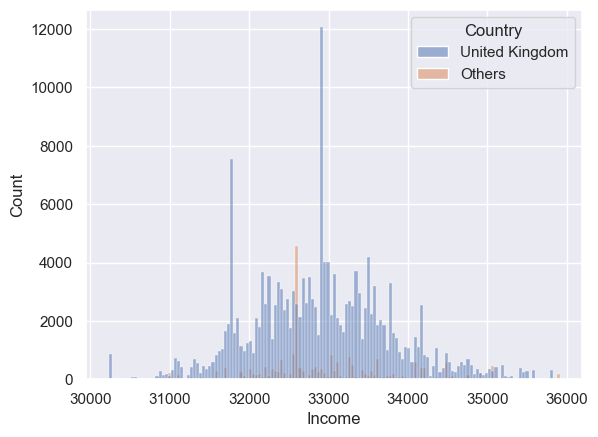

In [83]:
# Построим гистограмму распределения Income по Gender
sns.histplot(x = 'Income', hue = 'Country', data = df) 

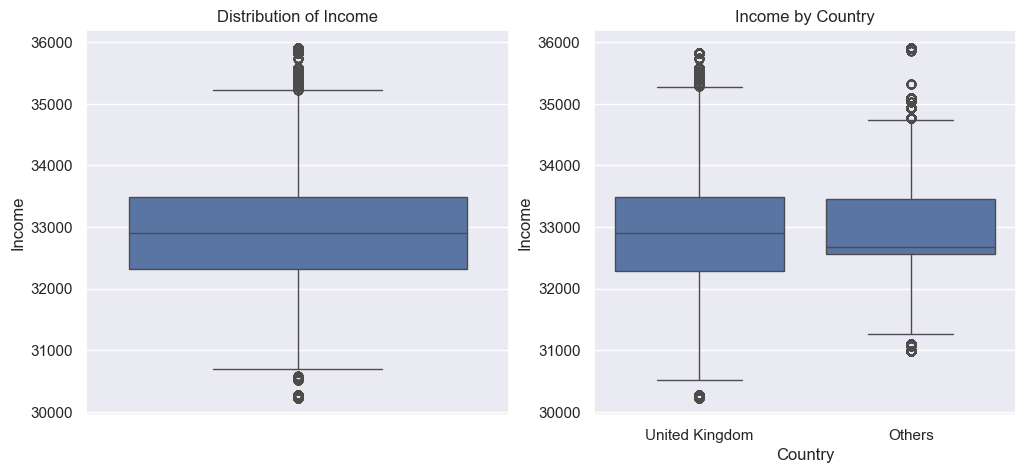

In [84]:
fig, axes = plt.subplots(1, 2, figsize = (12, 5))

# Распределение "Income" в виде 'ящика с усами'
sns.boxplot(ax = axes[0], y = df['Income'])
axes[0].set_title('Distribution of Income')
axes[0].set_ylabel('Income')

# Распределение "Income" в виде 'ящика с усами' по версиям
sns.boxplot(ax = axes[1], x = 'Country', y = 'Income', data = df)
axes[1].set_title('Income by Country')
axes[1].set_ylabel('Income')

plt.show()

## 3 этап -- выявление взаимосвязи


# Когортный анализ


# RFM-анализ
